In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Celeb-DF',
 'extract_compressed_videos.py',
 'faceapp',
 'ffhq',
 'future_work.png',
 'manipulated_sequences',
 'movefiles.py',
 'original_sequences',
 'pggan_v1',
 'pggan_v2',
 'stargan',
 'stylegan_celeba',
 'stylegan_ffhq',
 'test_frames',
 'test_split.csv',
 'train_split.csv',
 'Untitled.ipynb',
 'val_split.csv',
 'videdo_to_frame.py']

In [3]:
import pandas as pd
# importing shutil module
import shutil
df = pd.read_csv('val_split.csv')
df['0'] = df['0'].astype(str).apply(lambda i: '{0:0>4}'.format(i)) #+ '_' + df['1'].astype(str).apply(lambda i: '{0:0>3}'.format(i))
# df['flname'].astype(str)
dfx = pd.DataFrame()
dfx['0'] = df['0']
dfx ['a']= pd.concat([dfx['0'],df['1']],ignore_index=True)
dfx

,0,a
0,0720,0720
1,0939,0939
2,0284,0284
3,0402,0402
4,0820,0820
...,...,...
65,0632,0632
66,0927,0927
67,0350,0350
68,0595,0595


In [4]:
df

,0,1
0,0720,672
1,0939,115
2,0284,263
3,0402,453
4,0820,818
...,...,...
65,0632,548
66,0927,912
67,0350,349
68,0595,597


In [1]:
# Python program to explain shutil.move() method
	
# importing os module
import os
import pandas as pd
# importing shutil module
import shutil
from tqdm import tqdm
folder = 'youtube'
split = 'test'
read_fldr = {'validation':'val_split.csv','train':'train_split.csv','test':'test_split.csv'}
src = 'original_sequences/'
if folder == 'youtube':
    dfx = pd.read_csv(read_fldr[split])
    dfx['0'] = dfx['0'].astype(str).apply(lambda i: '{0:0>3}'.format(i))  
    dfx['1'] = dfx['1'].astype(str).apply(lambda i: '{0:0>3}'.format(i))
    # df['flname'].astype(str)
    df = pd.DataFrame()
    # df['0'] = dfx['0'].copy()
    df['flname'] = pd.concat([dfx['0'],dfx['1']],ignore_index=True)
    # df.rename(columns={'0':'flname'},inplace = True)
    df['flname'].astype(str)
else:
    df = pd.read_csv(read_fldr[split])
    df['flname'] = df['0'].astype(str).apply(lambda i: '{0:0>3}'.format(i)) + '_' + df['1'].astype(str).apply(lambda i: '{0:0>3}'.format(i))
    df['flname'].astype(str)

# # path
# path = 'manipulated_sequences/Face2Face/c23/images'

# # List files and directories
# # in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'
print("Before moving file:")
# print(os.listdir(path))


# # Source path

source = src + folder + '/c23/images'
# # Destination path
destination = src + folder + '/c23/' + split +'/'
os.makedirs(destination)
i = 0
for file in tqdm(os.listdir(source)):
    if file in list(df['flname']):
        # print(file)
        # Move the content of
        # source to destination
        sourcex = os.path.join(source,file)
        # print(sourcex)
        for f in os.listdir(sourcex):
            # print(f)
            if f.endswith('.png'):
                fl = os.path.join(sourcex,f'df_{i}.png')
                os.rename(os.path.join(sourcex,f),fl)
                # print()
                dest = shutil.move(fl, destination)
                i+=1
    else:
        # print('h')
        pass
        # print(file)


# # List files and directories
# # in "C:/Users / Rajnish / Desktop / GeeksforGeeks"
# print("After moving file:")
# print(os.listdir(path))

# # Print path of newly
# # created file
# print("Destination path:", dest)


In [3]:
'071_054' == df['flname'].iloc[10]

NameError: name 'df' is not defined

In [ ]:
df['flname'][df['flname'] == '071_054' ]

In [6]:
import matplotlib.pyplot as plt

In [8]:
imgr = plt.imread('original_sequences/youtube/c23/train/df_0.png')
imgf = plt.imread('manipulated_sequences/Deepfakes/c23/images/000_003/0000.png')

ValueError: operands could not be broadcast together with shapes (720,1280,3) (480,640,3) 

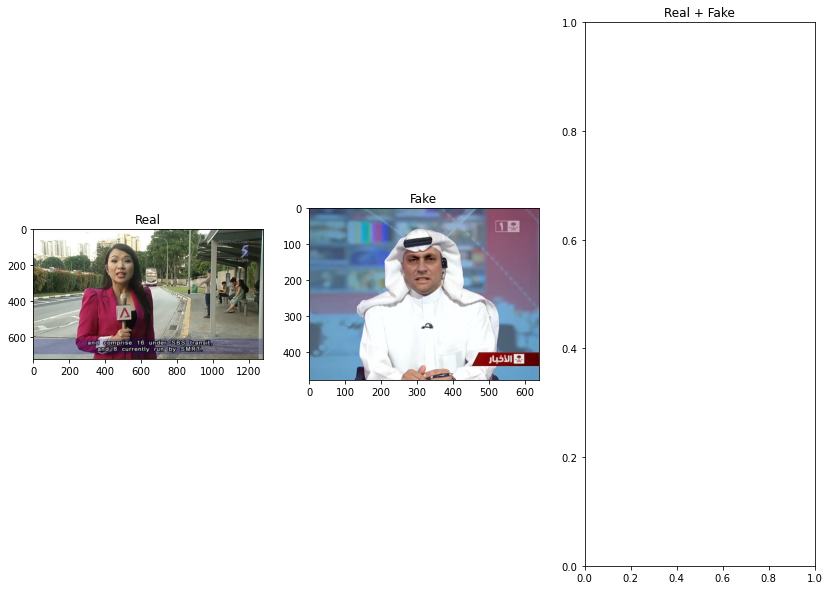

In [9]:
plt.figure(figsize = (14,10))
plt.subplot(131)
plt.title('Real')
plt.imshow(imgr)
plt.subplot(132)
plt.title('Fake')
plt.imshow(imgf)
plt.subplot(133)
plt.title('Real + Fake')
plt.imshow( 0.5 *imgr + 0.5 *imgf)
# plt.show()

In [15]:
# !conda install -c conda-forge dlib

In [54]:
import os
import sys
import dlib
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# adjust these variables as necessary

# dirname is the directory relative to the script where the files to detect a face and crop live
dirname = "source"
#  put_dirname is the name of the directory where the cropped images will be written, relative to the script
put_dirname = "cropped"
# the width and height in pixels of the saved image
crop_width = 224
# whether this is just a face crop (true) or whether we're trying to include other elements in the image. 
# Based on the shortest distance between the detected face square and the edge of the image
simple_crop = True


face_detector = dlib.get_frontal_face_detector()
file_types = ('.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG')

files = [file_i
         for file_i in os.listdir(dirname)
         if file_i.endswith(file_types)]


filenames = [os.path.join(dirname, fname)
             for fname in files]
             
# do face detection on the image

print('found %d files' % len(filenames))

filename_inc = 100

filecount = 1

for file in filenames:
    img = cv2.imread(file)
    # print(img.shape)
    detected_faces = face_detector(img, 1)
    print("[%d of %d] %d detected faces in %s" % (filecount, len(filenames), len(detected_faces), file))
    for i, face_rect in enumerate(detected_faces):
        width = face_rect.right() - face_rect.left()
        height = face_rect.bottom() - face_rect.top()
        
        # if width >= crop_width and height >= crop_width:
        image_to_crop = Image.open(file)
        crop_area = (face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom())
        print('saved')
        cropped_image = image_to_crop.crop(crop_area)
        crop_size = (crop_width, crop_width)
        cropped_image.thumbnail(crop_size)
        cv2.resize(img, (256, 256))
        cropped_image.save(put_dirname + "/" + str(filename_inc) + ".jpg", "JPEG")
            
        filename_inc += 1
    filecount += 1

found 2 files
[1 of 2] 1 detected faces in source\100.jpg
saved
[2 of 2] 1 detected faces in source\df_0.png
saved


In [48]:
img = cv2.imread('source/df_0.png')
detected_faces = face_detector(img, 1)
for i, face_rect in enumerate(detected_faces):
    image_to_crop = Image.open(file)
    crop_area = (face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom())
    cropped_image = image_to_crop.crop(crop_area)
    crop_size = (crop_width, crop_width)
    cropped_image.thumbnail(crop_size)
    cropped_image.save(put_dirname + "/" + str(filename_inc) + ".jpg", "JPEG")
    